In [13]:
import tensorflow as tf
import collections
import matplotlib.pyplot as plt

In [14]:
dataset=tf.keras.datasets.mnist.load_data()

In [15]:
train,test=dataset

In [16]:
(X_train,y_train),(X_test,y_test)=dataset

In [17]:
collections.Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [18]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=['sparse_categorical_crossentropy'],metrics=['accuracy'],)

In [22]:
r=model.fit(X_train,y_train,validation_split=0.2,batch_size=50,epochs=50)

Epoch 1/50
960/960 [==============================] - 1s 924us/step - loss: 3.7675 - accuracy: 0.7361 - val_loss: 0.6540 - val_accuracy: 0.8465
Epoch 2/50
960/960 [==============================] - 1s 829us/step - loss: 0.6981 - accuracy: 0.8219 - val_loss: 0.4882 - val_accuracy: 0.8927
Epoch 3/50
960/960 [==============================] - 1s 844us/step - loss: 0.5454 - accuracy: 0.8585 - val_loss: 0.4412 - val_accuracy: 0.9059
Epoch 4/50
960/960 [==============================] - 1s 813us/step - loss: 0.4549 - accuracy: 0.8770 - val_loss: 0.3413 - val_accuracy: 0.9211
Epoch 5/50
960/960 [==============================] - 1s 805us/step - loss: 0.4279 - accuracy: 0.8869 - val_loss: 0.3294 - val_accuracy: 0.9295
Epoch 6/50
960/960 [==============================] - 1s 809us/step - loss: 0.3889 - accuracy: 0.8987 - val_loss: 0.2711 - val_accuracy: 0.9389
Epoch 7/50
960/960 [==============================] - 1s 819us/step - loss: 0.3704 - accuracy: 0.9046 - val_loss: 0.2619 - val_accuracy:

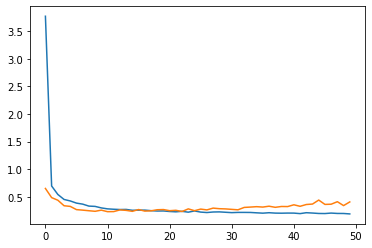

In [23]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

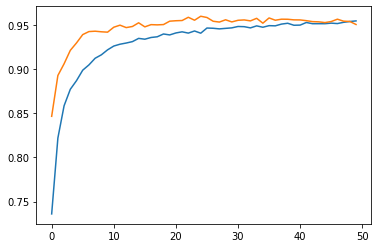

In [24]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 871us/step - loss: 0.5029 - accuracy: 0.94980s - loss: 0.5036 - accuracy: 0.95


[0.5029155611991882, 0.9498000144958496]